# Introduction
    After performing feature selection, the linear regression model will be used as a baseline, and the model with the highest accuracy will be found
    through modeling techniques such as DecisionTree, MLP, and Ensemble.

## 1) Feature selection
    If the number of features is large, the complexity increases according to the number of samples, so the probability of overfitting is high. Therefore, we will see the difference from the original feature by removing the Irrelevant and Redundant features

######  Load training dataset and test dataset into Pandas

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import numpy as np

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pickle
df_train = pd.read_csv('Train_data.csv')
df_test = pd.read_csv('test_data.csv')
df_test = df_test.drop('Unnamed: 0', axis=1)

In [55]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,20,2,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,45,2,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,icmp,50,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,icmp,25,2,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,icmp,25,2,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [57]:
df_train.is_host_login.tail()

125968    0
125969    0
125970    0
125971    0
125972    0
Name: is_host_login, dtype: int64

In [58]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,icmp,25,4,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.65,0.65,0.32,0.32,dos
1,0,icmp,25,2,312,1856,0,0,0,0,...,254,1.00,0.00,1.00,0.06,0.00,0.00,0.00,0.00,normal
2,0,icmp,25,2,245,2058,0,0,0,0,...,255,1.00,0.00,0.01,0.05,0.01,0.00,0.00,0.00,normal
3,0,icmp,25,2,298,1267,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
4,0,icmp,20,2,740,0,0,0,0,0,...,19,0.18,0.03,0.18,0.00,0.00,0.00,0.00,0.00,normal


In [59]:
features_obj = df_test.columns

for f in features_obj:
  print(f)
  print(np.unique(df_test[f].values))

duration
[    0     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    18    20    21    22    23    26    27
    28    29    30    31    35    39    41    43    49    58    60    67
    69    73    75    90    91    92    94   107   117   126   133   138
   140   142   148   160   163   171   182   218   239   247   277   280
   281   282   283   284   287   289   300   345   426   440   657   684
   718   731   748   789   791   792   795   796   798   799   801   802
   803   804   805   806   807   809   812   813   814   815   816   817
   818   819   841   857   886   894   895   896   897   898   899   900
   901   902   903   904   905   906   907   908   912   918   924   926
   929   933   937   938   939   940   942   948  1009  1019  1021  1022
  1179  1419  1776  2054  2055  2057  2058  2059  2060  2061  2062  2064
  2065  2066  2067  2068  2069  2070  2071  2072  2073  2074  2075  2076
  2077  2079  2080  2088  2224  2359  4906

###### Store the training dataset and test dateaset in each df and divide X and Y (whether it is xAttack or analysis features)

In [6]:
X_train = df_train.drop('xAttack', axis=1)
Y_train = df_train.loc[:,['xAttack']]
X_test = df_test.drop('xAttack', axis=1)
Y_test = df_test.loc[:,['xAttack']]

###### Apply preprocessing and one hot encoding, X for onehotencoder, Y for LabelBinarizer

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [8]:
le = preprocessing.LabelEncoder()
enc = OneHotEncoder()
lb = preprocessing.LabelBinarizer()

- X OneHotEncoding

In [9]:
X_train['protocol_type'] = le.fit_transform(X_train['protocol_type'])

X_test['protocol_type'] = le.fit_transform(X_test['protocol_type'])
X_train.head(40)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0,0,50,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
6,0,0,50,4,0,0,0,0,0,0,...,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00
7,0,0,50,4,0,0,0,0,0,0,...,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00
8,0,0,52,4,0,0,0,0,0,0,...,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00
9,0,0,50,4,0,0,0,0,0,0,...,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00


- Y LabelBinarizer

In [10]:
Y_train['xAttack'] = le.fit_transform(Y_train['xAttack'])
lb.fit_transform(Y_train['xAttack'])

Y_test['xAttack'] = le.fit_transform(Y_test['xAttack'])
lb.fit_transform(Y_test['xAttack'])

Y_train.describe()

,xAttack
count,125973.000000
mean,0.744985
std,0.653748
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,4.000000


### 1. Standard deviation
    We applied a method to exclude features with small standard deviation (small deviation). However, when the feature type was discrete, the deviation was inevitably small, so it was determined that it was unreasonable, and we decided to think only when it was continuous.

In [11]:
#except continuous feature
con_list = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'su_attempted', 'is_host_login', 'is_guest_login']
con_train = X_train.drop(con_list, axis=1)

#drop n smallest std features
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0).head(10)

,0
num_outbound_cmds,0.000000
urgent,0.014366
num_shells,0.022181
root_shell,0.036603
num_failed_logins,0.045239
num_access_files,0.099370
dst_host_srv_diff_host_rate,0.112564
diff_srv_rate,0.180314
dst_host_diff_srv_rate,0.188922
wrong_fragment,0.253530


#### Since num_outbound_cmds has a standard deviation of 0, remove it first.

In [12]:
X_train = X_train.drop(['num_outbound_cmds'], axis=1)
X_test = X_test.drop(['num_outbound_cmds'], axis=1)

df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head()

X_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,20,2,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,45,2,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,0,50,4,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,0,25,2,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,0,25,2,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### Select 10 low std and save features in drop -> X_train_stdrop. (To be used after the Ensemble feature selection)

In [13]:
stdrop_list = ['urgent', 'num_shells', 'root_shell',
        'num_failed_logins', 'num_access_files', 'dst_host_srv_diff_host_rate',
        'diff_srv_rate', 'dst_host_diff_srv_rate', 'wrong_fragment']

X_test_stdrop = X_test.drop(stdrop_list, axis=1)

X_train_stdrop = X_train.drop(stdrop_list, axis=1)

df_train_stdrop = pd.concat([X_train_stdrop, Y_train], axis=1)

df_train_stdrop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,hot,logged_in,num_compromised,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,xAttack
0,0,0,20,2,491,0,0,0,0,0,...,0.00,150,25,0.17,0.17,0.00,0.00,0.05,0.00,1
1,0,2,45,2,146,0,0,0,0,0,...,0.00,255,1,0.00,0.88,0.00,0.00,0.00,0.00,1
2,0,0,50,4,0,0,0,0,0,0,...,0.00,255,26,0.10,0.00,1.00,1.00,0.00,0.00,0
3,0,0,25,2,232,8153,0,0,1,0,...,0.00,30,255,1.00,0.03,0.03,0.01,0.00,0.01,1
4,0,0,25,2,199,420,0,0,1,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,1


###  Linear regression Performance

- Linear regression

In [14]:
from sklearn import linear_model

In [15]:
LR = linear_model.LinearRegression()

In [16]:
LR.fit(X_train, Y_train)

LinearRegression()

In [17]:
lr_score = LR.score(X_test, Y_test)
print('Linear regression processing ,,,')
print('Linear regression Score: %.2f %%' % lr_score)

Linear regression processing ,,,
Linear regression Score: 0.33 %


#####  Linear regression is only 33% probability.

### 2. Ensemble feature selection
    Ensemble Modeling
    Can check how much the feature affected each model. Therefore, feature selection was conducted around the features (an attempt to remove Irelevant features).

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier

In [19]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=1.0)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, max_features='auto')

In [20]:
y_train = Y_train['xAttack'].ravel()
x_train = X_train.values
x_test = X_test.values

### feature importances--While looking at, check in advance how much accuracy is achieved as a basic feature.

In [21]:
AB.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [22]:
AB_feature = AB.feature_importances_
AB_feature

ab_score = AB.score(X_test, Y_test)

print('AdaBoostClassifier processing ,,,')
print('AdaBoostClassifier Score: %.3f %%' % ab_score)

AdaBoostClassifier processing ,,,
AdaBoostClassifier Score: 0.759 %


In [23]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [24]:
RF_feature = RF.feature_importances_
RF_feature

rf_score = RF.score(X_test, Y_test)

print('RandomForestClassifier processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf_score)

RandomForestClassifier processing ,,,
RandomForestClassifier Score: 0.763 %


In [25]:
ET.fit(X_train, Y_train)

ExtraTreesClassifier(n_estimators=10)

In [26]:
ET_feature = ET.feature_importances_
ET_feature

et_score = ET.score(X_test, Y_test)

print('ExtraTreesClassifier processing ,,,')
print('ExtraTreeClassifier: %.3f %%' % et_score)

ExtraTreesClassifier processing ,,,
ExtraTreeClassifier: 0.767 %


In [27]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [28]:
GB_feature = GB.feature_importances_
GB_feature

gb_score = GB.score(X_test, Y_test)

print('GradientBoostingClassifier processing ,,,')
print('GradientBoostingClassifier Score: %.3f %%' % gb_score)

GradientBoostingClassifier processing ,,,
GradientBoostingClassifier Score: 0.767 %


### Let's find out how each feature affects it through Ensemble.

In [29]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'AdaBoost' : AB_feature,
                           'RandomForest' : RF_feature,
                           'ExtraTree' : ET_feature,
                           'GradientBoost' : GB_feature
                          })
feature_df.head(8)

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
0,duration,NaN,0.004046,0.003177,0.001020
1,protocol_type,0.148659,0.014101,0.019395,0.011459
2,service,NaN,0.033282,0.015227,0.007675
3,flag,NaN,0.094710,0.004816,0.001157
4,src_bytes,NaN,0.098430,0.018754,0.361582
5,dst_bytes,NaN,0.059836,0.007203,0.062867
6,land,NaN,0.000028,0.000040,0.000036
7,wrong_fragment,0.000125,0.006463,0.016824,0.013347



Expressing the influence of features in a graph

[Text(0, 0, 'duration'),
 Text(0, 0, 'protocol_type'),
 Text(0, 0, 'service'),
 Text(0, 0, 'flag'),
 Text(0, 0, 'src_bytes'),
 Text(0, 0, 'dst_bytes'),
 Text(0, 0, 'land'),
 Text(0, 0, 'wrong_fragment'),
 Text(0, 0, 'urgent'),
 Text(0, 0, 'hot'),
 Text(0, 0, 'num_failed_logins'),
 Text(0, 0, 'logged_in'),
 Text(0, 0, 'num_compromised'),
 Text(0, 0, 'root_shell'),
 Text(0, 0, 'su_attempted'),
 Text(0, 0, 'num_root'),
 Text(0, 0, 'num_file_creations'),
 Text(0, 0, 'num_shells'),
 Text(0, 0, 'num_access_files'),
 Text(0, 0, 'is_host_login'),
 Text(0, 0, 'is_guest_login'),
 Text(0, 0, 'count'),
 Text(0, 0, 'srv_count'),
 Text(0, 0, 'serror_rate'),
 Text(0, 0, 'srv_serror_rate'),
 Text(0, 0, 'rerror_rate'),
 Text(0, 0, 'srv_rerror_rate'),
 Text(0, 0, 'same_srv_rate'),
 Text(0, 0, 'diff_srv_rate'),
 Text(0, 0, 'srv_diff_host_rate'),
 Text(0, 0, 'dst_host_count'),
 Text(0, 0, 'dst_host_srv_count'),
 Text(0, 0, 'dst_host_same_srv_rate'),
 Text(0, 0, 'dst_host_diff_srv_rate'),
 Text(0, 0, 'dst_

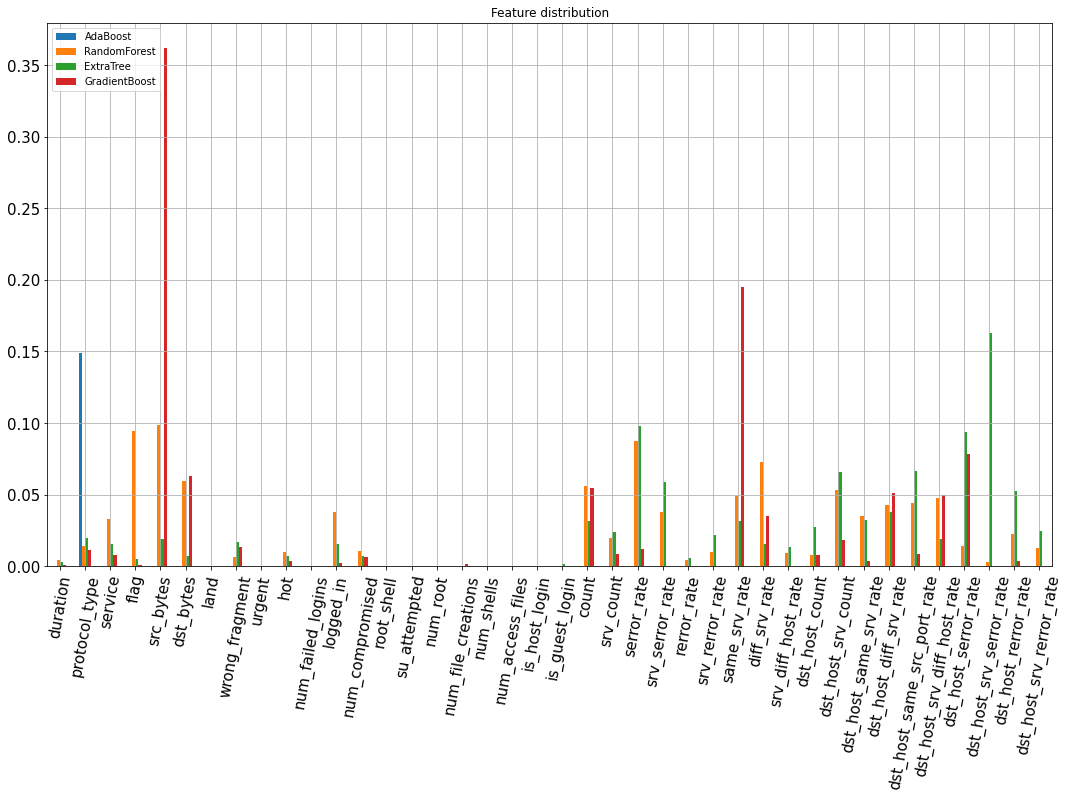

In [30]:
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

graph = feature_df.plot.bar(figsize = (18, 10), title = 'Feature distribution', grid=True, legend=True, fontsize = 15, 
                            xticks=feature_df.index)
graph.set_xticklabels(feature_df.features, rotation = 80)

####  12 features are extracted from each Ensemble model

In [31]:
a_f = feature_df.nlargest(12, 'AdaBoost')
e_f = feature_df.nlargest(12, 'ExtraTree')
g_f = feature_df.nlargest(12, 'GradientBoost')
r_f = feature_df.nlargest(12, 'RandomForest')

Delete duplicates

In [32]:
result = pd.concat([a_f, e_f, g_f, r_f])
result = result.drop_duplicates() # duplicate feature삭제
result

,features,AdaBoost,RandomForest,ExtraTree,GradientBoost
11,logged_in,inf,0.038162,0.015770,0.002512
39,dst_host_srv_rerror_rate,inf,0.013028,0.024556,0.000066
1,protocol_type,0.148659,0.014101,0.019395,0.011459
12,num_compromised,0.000159,0.010303,0.006881,0.006704
7,wrong_fragment,0.000125,0.006463,0.016824,0.013347
28,diff_srv_rate,0.000113,0.073057,0.015534,0.035085
9,hot,0.000099,0.009760,0.007203,0.003269
20,is_guest_login,0.000004,0.000414,0.001250,0.000087
24,srv_serror_rate,0.000003,0.037802,0.059025,0.000349
16,num_file_creations,0.000003,0.000340,0.000179,0.001475


In [33]:
selected_features = result['features'].values.tolist()
selected_features

['logged_in',
 'dst_host_srv_rerror_rate',
 'protocol_type',
 'num_compromised',
 'wrong_fragment',
 'diff_srv_rate',
 'hot',
 'is_guest_login',
 'srv_serror_rate',
 'num_file_creations',
 'num_root',
 'root_shell',
 'dst_host_srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_count',
 'dst_host_rerror_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'count',
 'same_srv_rate',
 'dst_host_count',
 'src_bytes',
 'dst_bytes',
 'dst_host_srv_diff_host_rate',
 'flag']

### Below is the result of training excluding features with small standard deviation..

In [34]:
AB.fit(X_train_stdrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [35]:
ab2_score = AB.score(X_test_stdrop, Y_test)

print('AdaBoostClassifier_stdrop processing ,,,')
print('AdaBoostClasifier Score: %.3f %%' % ab2_score)

AdaBoostClassifier_stdrop processing ,,,
AdaBoostClasifier Score: 0.766 %


In [36]:
RF.fit(X_train_stdrop, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [37]:
rf2_score = RF.score(X_test_stdrop, Y_test)

print('RandomForestClassifier_stdrop processing ,,,')
print('RandomForestClassifier Score: %.3f %%' % rf2_score)

RandomForestClassifier_stdrop processing ,,,
RandomForestClassifier Score: 0.750 %


In [38]:
ET.fit(X_train_stdrop, Y_train)

ExtraTreesClassifier(n_estimators=10)

In [39]:
et2_score = ET.score(X_test_stdrop, Y_test)

print('ExtraTreesClassifier_stdrop processing ,,,')
print('ExtraTreesClassifier Score: %.3f %%' % et2_score)

ExtraTreesClassifier_stdrop processing ,,,
ExtraTreesClassifier Score: 0.747 %


In [40]:
GB.fit(X_train_stdrop, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [41]:
gb2_score = GB.score(X_test_stdrop, Y_test)

print('GradientBoostingClassifier_stdrop processing ,,,')
print('GradientBoostingClassifier Score: %.2f %%' % gb2_score)

GradientBoostingClassifier_stdrop processing ,,,
GradientBoostingClassifier Score: 0.75 %


Proceed with only features obtained through ensemble

In [42]:
X_train_ens = X_train[selected_features]
X_train_ens.head()

X_test_ens = X_test[selected_features]
X_test_ens.head()

,logged_in,dst_host_srv_rerror_rate,protocol_type,num_compromised,wrong_fragment,diff_srv_rate,hot,is_guest_login,srv_serror_rate,num_file_creations,...,dst_host_rerror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,count,same_srv_rate,dst_host_count,src_bytes,dst_bytes,dst_host_srv_diff_host_rate,flag
0,0,0.32,0,0,0,0.0,0,0,1.0,0,...,0.32,0.00,1.00,110,1.0,255,0,0,0.00,4
1,1,0.00,0,0,0,0.0,0,0,0.0,0,...,0.00,0.00,1.00,1,1.0,1,312,1856,0.06,2
2,1,0.00,0,0,0,0.0,0,0,0.0,0,...,0.00,0.00,1.00,5,1.0,114,245,2058,0.05,2
3,1,0.00,0,0,0,0.0,0,0,0.0,0,...,0.00,0.00,1.00,4,1.0,255,298,1267,0.00,2
4,0,0.00,0,0,0,0.0,0,0,0.0,0,...,0.00,0.03,0.18,1,1.0,104,740,0,0.00,2


### 3. Correlation
    Among several features, features with high correlation (redundant features) were merged or deleted. This is because if the correlation between these features is large, it is not necessary to increase the number of features.

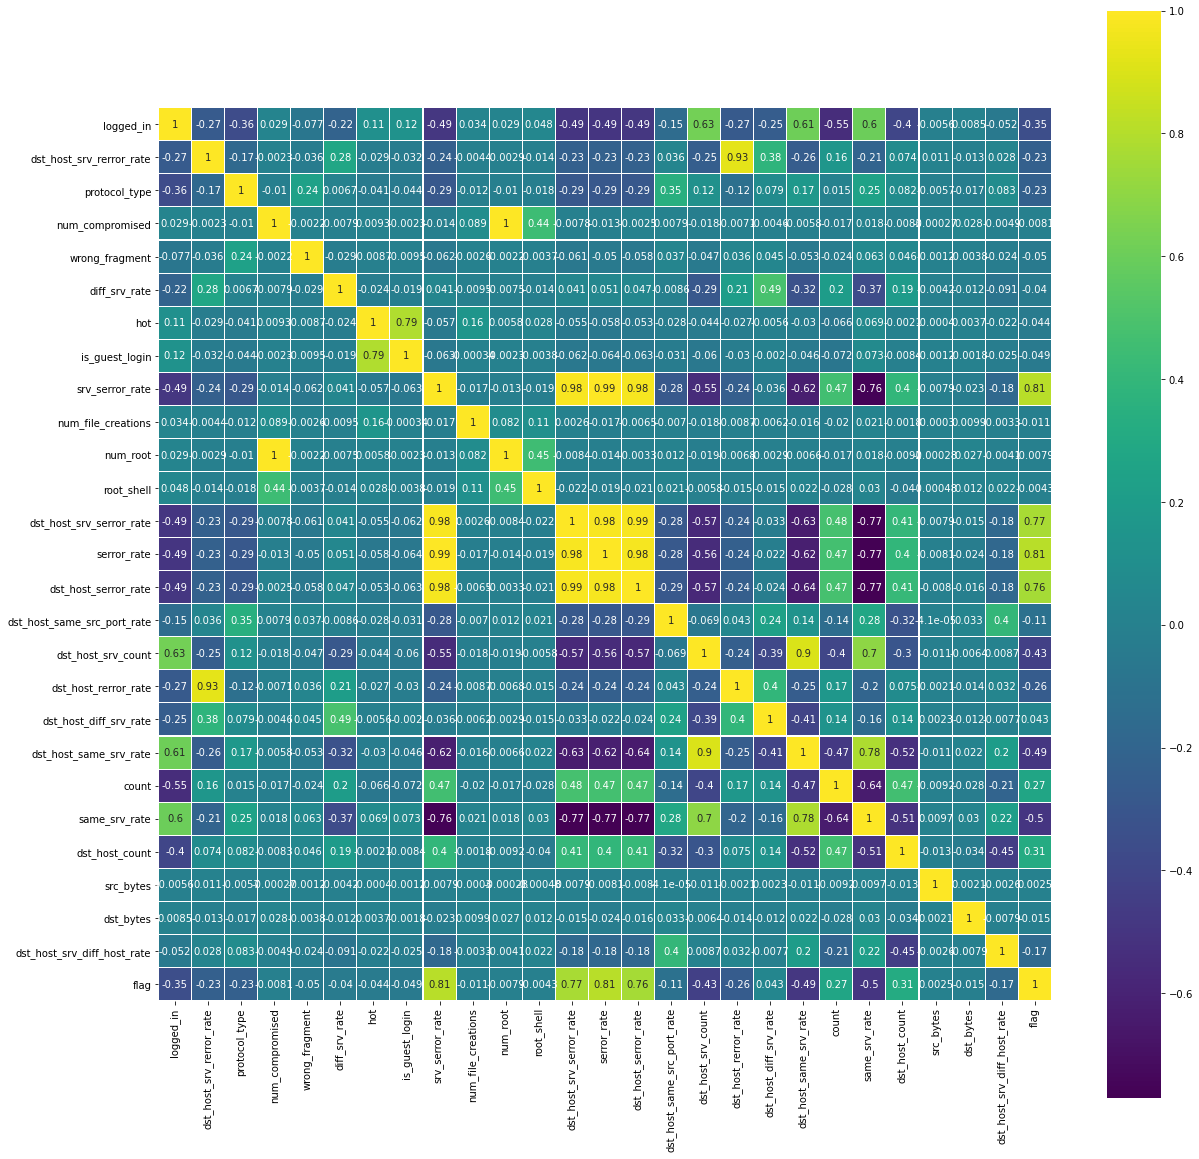

In [43]:
sample = X_train_ens[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

- As a result of analyzing the above graph, we found that the dependency on the following features is high, and then extracted

In [44]:
selected2 = [ 'dst_host_serror_rate', 'serror_rate']
X_train_cordrop = X_train_ens.drop(selected2, axis=1)
X_train_cordrop.describe()

X_test_cordrop = X_test_ens.drop(selected2, axis=1)
X_test_cordrop.describe()

,logged_in,dst_host_srv_rerror_rate,protocol_type,num_compromised,wrong_fragment,diff_srv_rate,hot,is_guest_login,srv_serror_rate,num_file_creations,...,dst_host_rerror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,count,same_srv_rate,dst_host_count,src_bytes,dst_bytes,dst_host_srv_diff_host_rate,flag
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.00000
mean,0.436600,0.230181,0.278600,0.020500,0.009000,0.089752,0.093200,0.02770,0.101696,0.00390,...,0.236296,0.089412,0.605769,80.152400,0.739925,194.522200,6.845032e+03,1.996999e+03,0.020102,2.20290
std,0.495989,0.403294,0.657134,0.289289,0.146701,0.252240,0.647731,0.16412,0.295464,0.11613,...,0.389137,0.218190,0.436278,129.028094,0.413711,93.746065,8.675409e+04,2.006975e+04,0.089353,1.07854
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.000000,0.070000,1.000000,0.200000,125.000000,0.000000e+00,0.000000e+00,0.000000,2.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.000000,0.020000,0.910000,8.000000,1.000000,255.000000,5.400000e+01,4.400000e+01,0.000000,2.00000
75%,1.000000,0.220000,0.000000,0.000000,0.000000,0.060000,0.000000,0.00000,0.000000,0.00000,...,0.390000,0.060000,1.000000,126.000000,1.000000,255.000000,2.850000e+02,5.990000e+02,0.010000,2.00000
max,1.000000,1.000000,2.000000,15.000000,3.000000,1.000000,30.000000,1.00000,1.000000,5.00000,...,1.000000,1.000000,1.000000,511.000000,1.000000,255.000000,6.291668e+06,1.285078e+06,1.000000,11.00000


## 2) Modeling

### Modeling after completing the feature selection process (low deviation, high correlation removal)

### Comparing final modeling results with features that have a lot of influence on Ensemble modeling

In [48]:
X_train_cordrop.head()

,logged_in,dst_host_srv_rerror_rate,protocol_type,num_compromised,wrong_fragment,diff_srv_rate,hot,is_guest_login,srv_serror_rate,num_file_creations,...,dst_host_rerror_rate,dst_host_diff_srv_rate,dst_host_same_srv_rate,count,same_srv_rate,dst_host_count,src_bytes,dst_bytes,dst_host_srv_diff_host_rate,flag
0,0,0.00,0,0,0,0.00,0,0,0.0,0,...,0.05,0.03,0.17,2,1.00,150,491,0,0.00,2
1,0,0.00,2,0,0,0.15,0,0,0.0,0,...,0.00,0.60,0.00,13,0.08,255,146,0,0.00,2
2,0,0.00,0,0,0,0.07,0,0,1.0,0,...,0.00,0.05,0.10,123,0.05,255,0,0,0.00,4
3,1,0.01,0,0,0,0.00,0,0,0.2,0,...,0.00,0.00,1.00,5,1.00,30,232,8153,0.04,2
4,1,0.00,0,0,0,0.00,0,0,0.0,0,...,0.00,0.00,1.00,30,1.00,255,199,420,0.00,2


In [46]:
features_obj = X_train_cordrop.columns

for f in features_obj:
  print(f)
  print(np.unique(X_train_cordrop[f].values))

logged_in
[0 1]
dst_host_srv_rerror_rate
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
protocol_type
[0 1 2]
num_compromised
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   21   22   23   31   37   38   40   44
   46   54   74   75   78   83   94  102  107  110  121  151  157  166
  174  175  177  187  193  198  202  217  237  247  258  281  307  345
  349  371  373  375  378  405  407  452  456  457  462  520  537  538
  543  558  568  622  676  682  691  716  751  756  

In [66]:
X_train_cordrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                125973 non-null  int32  
 1   is_guest_login               125973 non-null  int64  
 2   wrong_fragment               125973 non-null  int64  
 3   rerror_rate                  125973 non-null  float64
 4   num_failed_logins            125973 non-null  int64  
 5   land                         125973 non-null  int64  
 6   num_shells                   125973 non-null  int64  
 7   urgent                       125973 non-null  int64  
 8   su_attempted                 125973 non-null  int64  
 9   is_host_login                125973 non-null  int64  
 10  same_srv_rate                125973 non-null  float64
 11  dst_host_same_srv_rate       125973 non-null  float64
 12  srv_serror_rate              125973 non-null  float64
 13 

In [43]:
AB.fit(X_train_cordrop, Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [44]:
ab_finalscore = AB.score(X_test_cordrop, Y_test)

print('AdaBoostClassifier_final processing ,,,')
print('AdaBoostClassifier_final Score: %.3f %%' % ab_finalscore)

AdaBoostClassifier_final processing ,,,
AdaBoostClassifier_final Score: 0.758 %


In [45]:
RF.fit(X_train_cordrop, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [46]:
pickle.dump(RF, open('model.pkl','wb'))

In [47]:
rf_finalscore = RF.score(X_test_cordrop, Y_test)

print('RandomForestClassifier_final processing ,,,')
print('RandomForestClassifier_final Score: %.3f %%' % rf_finalscore)

RandomForestClassifier_final processing ,,,
RandomForestClassifier_final Score: 0.744 %


In [48]:
ET.fit(X_train_cordrop, Y_train)

ExtraTreesClassifier(n_estimators=10)

In [49]:
et_finalscore = ET.score(X_test_cordrop, Y_test)

print('ExtraTreesClassifier_final processing ,,,')
print('ExtraTreesClassifier_final Score: %.3f %%' % et_finalscore)

ExtraTreesClassifier_final processing ,,,
ExtraTreesClassifier_final Score: 0.775 %


In [50]:
GB.fit(X_train_cordrop, Y_train)

GradientBoostingClassifier(max_features='auto', n_estimators=200)

In [51]:
gb_finalscore = GB.score(X_test_cordrop, Y_test)

print('GradientBoostClassifier_final processing ,,,')
print('GradientBoostClassifier_final Score: %.3f %%' % gb_finalscore)

GradientBoostClassifier_final processing ,,,
GradientBoostClassifier_final Score: 0.762 %


In [52]:
LR.fit(X_train_cordrop, Y_train)

LinearRegression()

In [53]:
lr_finalscore = LR.score(X_test_cordrop, Y_test)

print('LinearRegression_final processing ,,,')
print('LinearRegression_final Score: %.3f %%' % lr_finalscore)

LinearRegression_final processing ,,,
LinearRegression_final Score: 0.364 %


In [54]:
from sklearn.neural_network import MLPClassifier

In [55]:
MLP = MLPClassifier(hidden_layer_sizes=(1000, 300, 300), solver='adam', shuffle=False, tol = 0.0001)

In [56]:
MLP.fit(X_train_cordrop, Y_train)

MLPClassifier(hidden_layer_sizes=(1000, 300, 300), shuffle=False)

In [57]:
mlp_finalscore = MLP.score(X_test_cordrop, Y_test)

print('MLP_final processing ,,,')
print('MLP_final Score: %.3f %%' % mlp_finalscore)

MLP_final processing ,,,
MLP_final Score: 0.572 %


## 3) Result

As a result, feature selection and extraction did not result in high probability. It showed an accuracy increase rate of about 1~2%, but the feature was reduced, so it was possible to perform a little faster operation and I think it will prevent overfitting when new data is entered.

### Score comparison for each model

- first models

In [58]:
first_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [lr_score, ab_score, rf_score, et_score, gb_score]}

result_df = pd.DataFrame(data = first_model)
result_df

,Model,accuracy
0,Linear Regression,0.334265
1,Adaboost,0.749300
2,RandomForest,0.763600
3,ExtraTrees,0.771400
4,GradientBoost,0.767100


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost')]

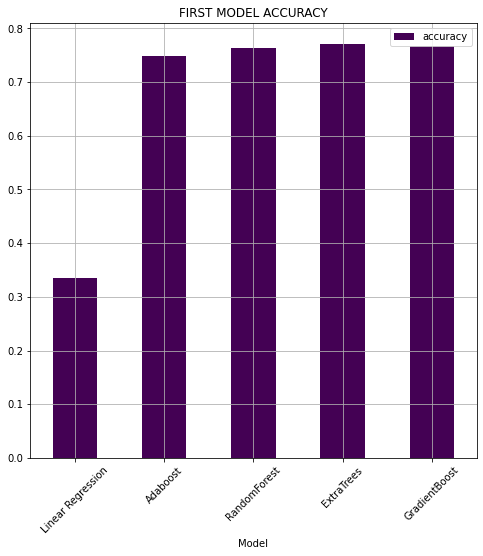

In [59]:
r1 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FIRST MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r1.set_xticklabels(result_df.Model, rotation = 45)

- second models

In [60]:
second_model = {'Model': ['Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost'],
               'accuracy' : [ab2_score, rf2_score, et2_score, gb2_score]}

result_df = pd.DataFrame(data = second_model)
result_df

,Model,accuracy
0,Adaboost,0.7640
1,RandomForest,0.7688
2,ExtraTrees,0.7527
3,GradientBoost,0.7494


[Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost')]

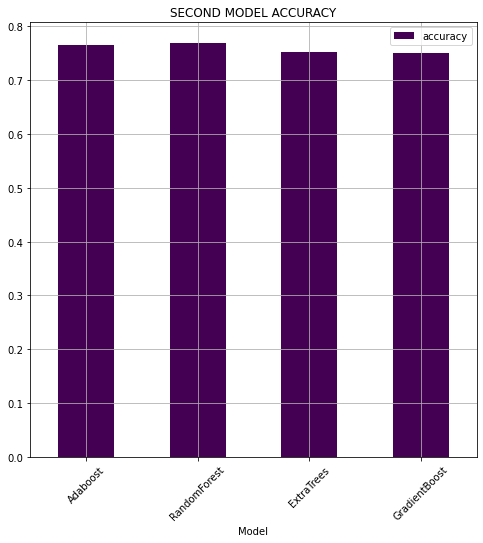

In [61]:
r2 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='SECOND MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r2.set_xticklabels(result_df.Model, rotation = 45)

- final models

In [62]:
final_model = {'Model': ['Linear Regression', 'Adaboost', 'RandomForest', 'ExtraTrees', 'GradientBoost', 'MLP'],
               'accuracy' : [lr_finalscore, ab_finalscore, rf_finalscore, et_finalscore, gb_finalscore, mlp_finalscore]}

result_df = pd.DataFrame(data = final_model)
result_df

,Model,accuracy
0,Linear Regression,0.363737
1,Adaboost,0.757700
2,RandomForest,0.744400
3,ExtraTrees,0.774700
4,GradientBoost,0.762300
5,MLP,0.572000


[Text(0, 0, 'Linear Regression'),
 Text(0, 0, 'Adaboost'),
 Text(0, 0, 'RandomForest'),
 Text(0, 0, 'ExtraTrees'),
 Text(0, 0, 'GradientBoost'),
 Text(0, 0, 'MLP')]

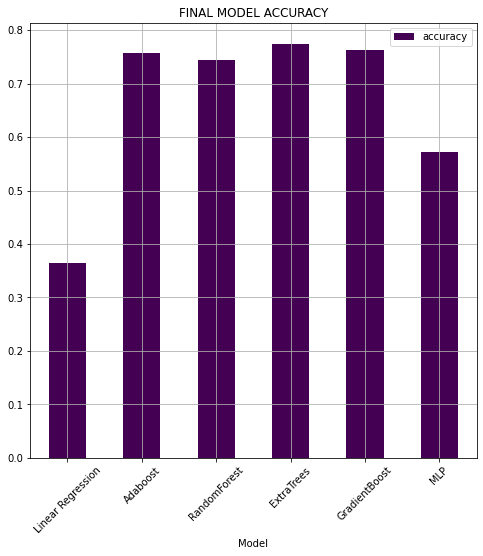

In [63]:
r3 = result_df.plot(x='Model', y='accuracy', kind='bar', figsize=(8, 8), grid=True, title='FINAL MODEL ACCURACY', colormap=plt.cm.viridis,
               sort_columns=True)
r3.set_xticklabels(result_df.Model, rotation = 45)

## FASTEST AND ACCURATE MODEL - final model of ExtraTrees(76.4%)
## STRONGEST AND THE MOST ACCURATE MODEL - final model of GradientBoost(77.1%)


Gradient boost has a 77% probability, but ExtraTress is much faster.